# Regression methods perform on ATMs transactions file

In [ ]:
Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import preprocessing

In [2]:
atmtrx = pd.read_csv('C:\\Users\\karol\\Downloads\\atmtrxnew.csv')

atmtrx.sample(5)

,atm_name,transaction_date,No_Of_Withdrawals,no_of_XYZ_card_withdrawals,no_of_other_card_withdrawals,total_amount_withdrawn,amount_withdrawn_XYZ_card,amount_withdrawn_other_card,weekday,working_day
1943,Big Street ATM,25/01/2012,48,32,16,190900,150100,40800,sunday,H
10890,Mount Road ATM,30/04/2017,32,12,20,84400,60500,23900,sunday,H
10415,Christ College ATM,29/11/2016,20,14,6,30700,23000,7700,tuesday,W
7026,Mount Road ATM,22/11/2014,144,92,52,674800,608600,66200,saturday,H
11470,Big Street ATM,06/09/2017,136,40,96,457500,215400,242100,wednesday,W


In [ ]:
# Pre-processing of dataset

In [3]:
# Drop columns which I don't need

atmtrx.drop(['transaction_date', 'no_of_XYZ_card_withdrawals','no_of_other_card_withdrawals','amount_withdrawn_XYZ_card','amount_withdrawn_other_card'], axis=1, inplace=True)
atmtrx.sample(5)

,atm_name,No_Of_Withdrawals,total_amount_withdrawn,weekday,working_day
7278,Christ College ATM,158,492000,sunday,H
10753,Christ College ATM,227,1023000,wednesday,H
1467,KK Nagar ATM,227,912700,friday,W
5617,Mount Road ATM,196,881600,monday,W
5773,Airport ATM,113,504500,thursday,W


In [4]:
#Standardize numeric data ( to have 0 mean and unit variance)

In [5]:
atmtrx[['No_Of_Withdrawals']] = preprocessing.scale(atmtrx[['No_Of_Withdrawals']].astype('float64'))
atmtrx[['total_amount_withdrawn']] = preprocessing.scale(atmtrx[['total_amount_withdrawn']].astype('float64'))

In [6]:
atmtrx.head()

,atm_name,No_Of_Withdrawals,total_amount_withdrawn,weekday,working_day
0,Big Street ATM,-1.089563,-1.226917,saturday,H
1,Mount Road ATM,1.926227,0.756133,saturday,H
2,Airport ATM,-0.376470,-0.058207,saturday,H
3,KK Nagar ATM,2.104500,1.302311,saturday,H
4,Christ College ATM,-0.733017,-0.722303,saturday,H


In [ ]:
#dataset only with one numerical dependent variable

In [7]:
atmtrx_1 = atmtrx.drop(columns=['atm_name','weekday','working_day'])
atmtrx_1.sample(5)

,No_Of_Withdrawals,total_amount_withdrawn
768,1.109141,0.924235
7181,-0.510175,-0.379633
1037,-0.406182,-0.372552
7026,0.306911,0.469498
9995,-1.550103,-1.475683


In [ ]:
#dataset with all numeric and categorical values

In [8]:
# Changing categorical value atm_name,weekday,working_day into numeric (the sequence doesnt matter)
atmtrx_2 = pd.get_dummies(atmtrx, columns=['atm_name',
                                           'weekday',
                                           'working_day'])

In [9]:
atmtrx_2.head()

,No_Of_Withdrawals,total_amount_withdrawn,atm_name_Airport ATM,atm_name_Big Street ATM,atm_name_Christ College ATM,atm_name_KK Nagar ATM,atm_name_Mount Road ATM,weekday_friday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,working_day_H,working_day_W
0,-1.089563,-1.226917,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,1.926227,0.756133,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,-0.376470,-0.058207,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2.104500,1.302311,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,-0.733017,-0.722303,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
 #dataset only with  atm_name

In [23]:
atmtrx_3 = atmtrx_2.drop(columns=['No_Of_Withdrawals','weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday','working_day_H','working_day_W'])
atmtrx_3.sample(5)

,total_amount_withdrawn,atm_name_Airport ATM,atm_name_Big Street ATM,atm_name_Christ College ATM,atm_name_KK Nagar ATM,atm_name_Mount Road ATM
7129,-0.514792,0,1,0,0,0
5098,-0.464916,0,1,0,0,0
6537,0.310324,0,0,0,1,0
9695,-1.369465,0,0,0,0,1
7680,0.427934,0,0,1,0,0


In [ ]:
 #dataset without atm_name

In [10]:
atmtrx_4 = atmtrx_2.drop(columns=['atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM'])
atmtrx_4.sample(5)

,No_Of_Withdrawals,total_amount_withdrawn,weekday_friday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,working_day_H,working_day_W
11067,1.005148,1.028606,0,0,0,0,0,0,1,0,1
4182,-1.104419,-1.150871,0,0,0,0,1,0,0,0,1
10054,-1.475822,-1.212447,1,0,0,0,0,0,0,0,1
1684,0.752594,0.031078,0,0,0,1,0,0,0,1,0
2990,-1.119275,-1.101918,0,1,0,0,0,0,0,1,0


In [ ]:
#dataset with trx number and working_day

In [11]:
atmtrx_5 = atmtrx_2.drop(columns=['atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM','weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday'])
atmtrx_5.sample(5)

,No_Of_Withdrawals,total_amount_withdrawn,working_day_H,working_day_W
9501,-0.198197,0.112974,1,0
5165,0.306911,0.020302,0,1
10126,-0.807297,-0.723842,0,1
4704,1.257702,0.922080,0,1
11311,-1.639239,-1.356534,0,1


In [12]:
result_dict = {}

In [28]:
def build_model(regression_fn,                
                name_of_y_col, 
                names_of_x_cols, 
                dataset, 
                test_frac=0.2,
                preprocess_fn=None,
                show_plot_Y=False,
                show_plot_scatter=False):
    
    X = dataset[names_of_x_cols]
    Y = dataset[name_of_y_col]

    if preprocess_fn is not None:
        X = preprocess_fn(X)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac)
    
    model = regression_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print("Training_score : " , model.score(x_train, y_train))
    print("Test_score : ", r2_score(y_test, y_pred))

    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.plot(y_pred, label='Predicted')
        plt.plot(y_test.values, label='Actual')
        
        plt.ylabel(name_of_y_col)

        plt.legend()
        plt.show()

    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12, 8))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['Observed data','Predicted line'])
        plt.show()
    
    return {
            'training_score': model.score(x_train, y_train),
            'test_score': r2_score(y_test, y_pred)
           }     

In [29]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training score', result_dict[key]['training_score'])
        print('Test score', result_dict[key]['test_score'])
        print()

In [30]:
def linear_reg(x_train, y_train):
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    return model

In [31]:
#Simple Linear Regression model with one numerical variable

Training_score :  0.8389926669274673
Test_score :  0.8453816625884092


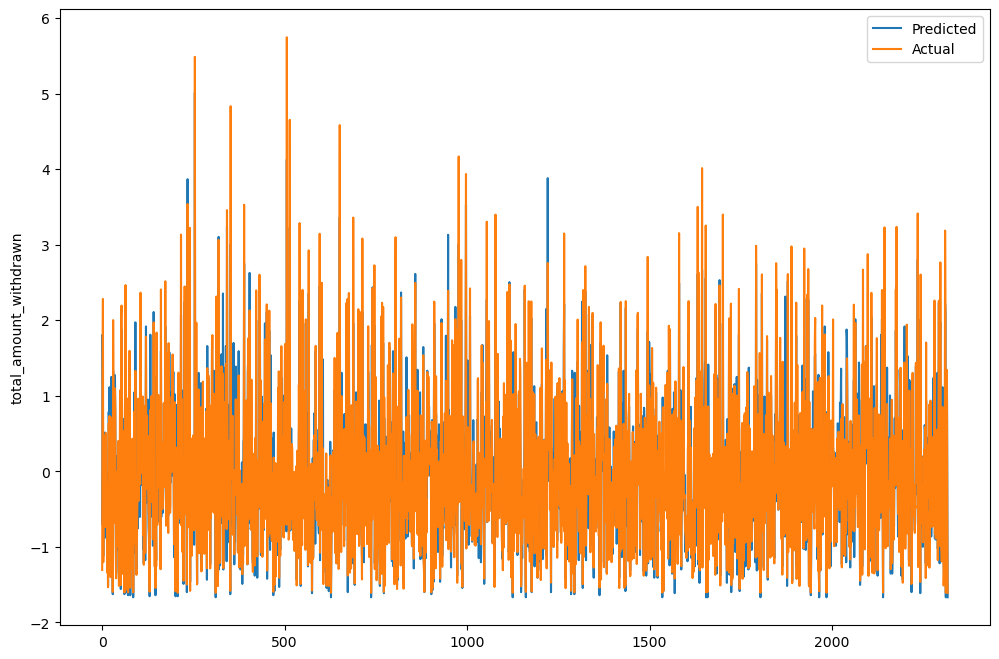

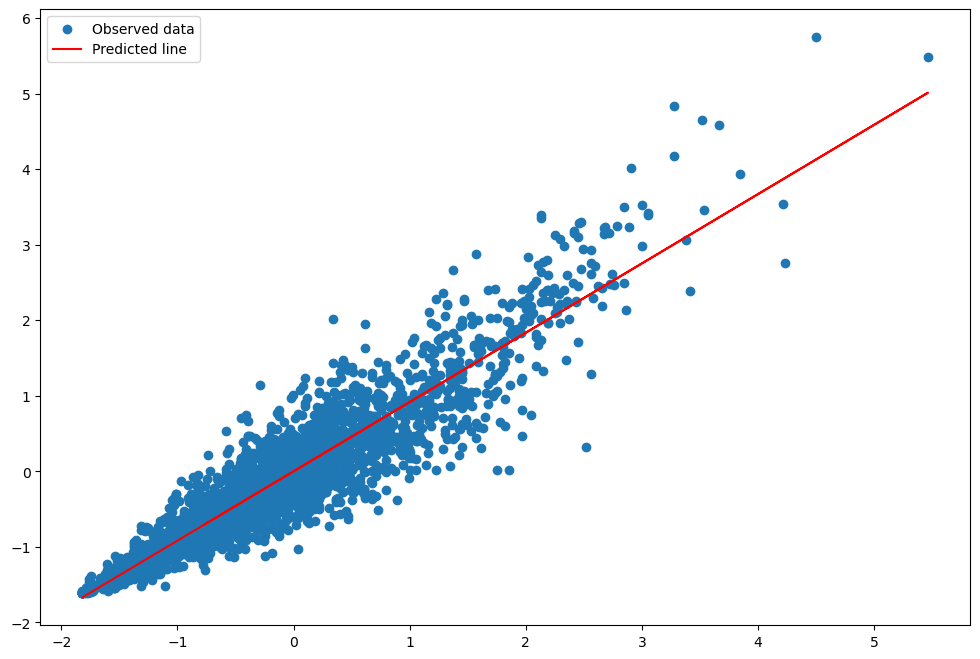

In [32]:
result_dict['total_amount_withdrawal ~ single_linear'] = build_model(linear_reg,
                                                 'total_amount_withdrawn',
                                                ['No_Of_Withdrawals'],
                                                  atmtrx_1,
                                                  show_plot_Y=True,
                                                show_plot_scatter = True)

Training_score :  0.8888987119907436
Test_score :  0.8868590063938822


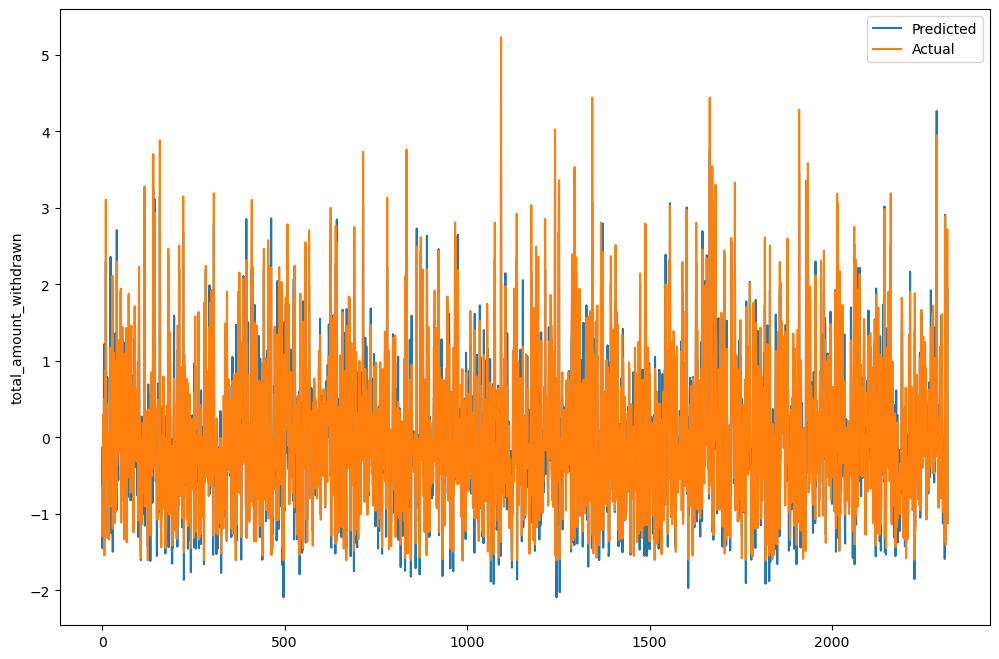

In [19]:
result_dict['total_amount_withdrawal ~ linear_with_multiple_features_categorical&numeric'] = build_model(linear_reg,
                                                      'total_amount_withdrawn',
                                                     ['No_Of_Withdrawals',
                                                      'atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM',
                                                     'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_2,
                                                      show_plot_Y=True)

Training_score :  0.2296897706540202
Test_score :  0.24301784020067874


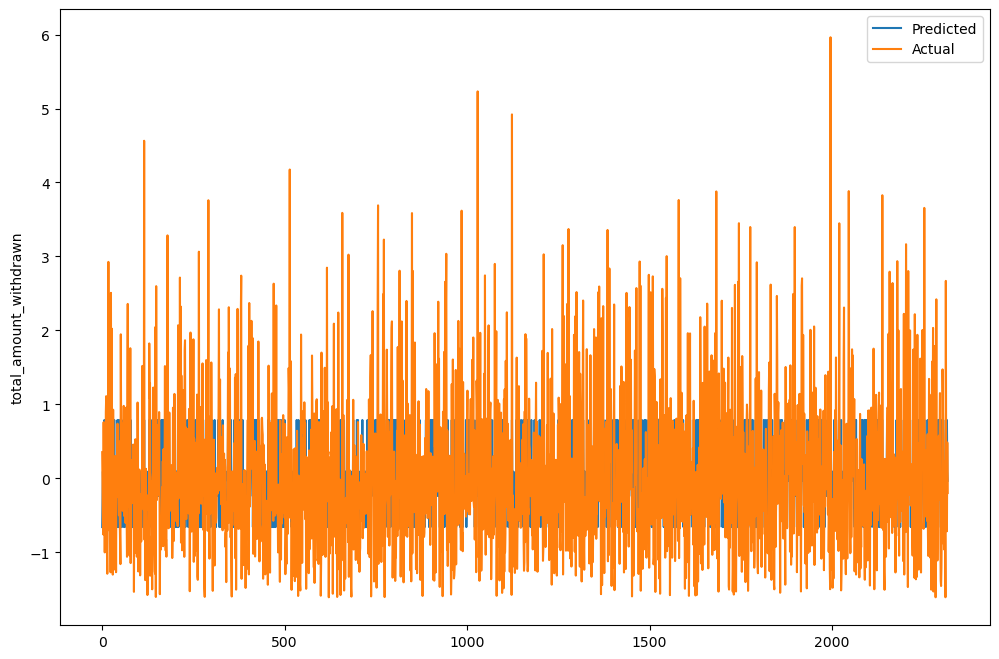

In [24]:
result_dict['total_amount_withdrawal ~ linear_with_only_atm_name'] = build_model(linear_reg,
                                                                                'total_amount_withdrawn',
                                                                                ['atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM'],
                                                                                atmtrx_3,
                                                                                show_plot_Y=True)

Training_score :  0.8458493509978152
Test_score :  0.8580839619674154


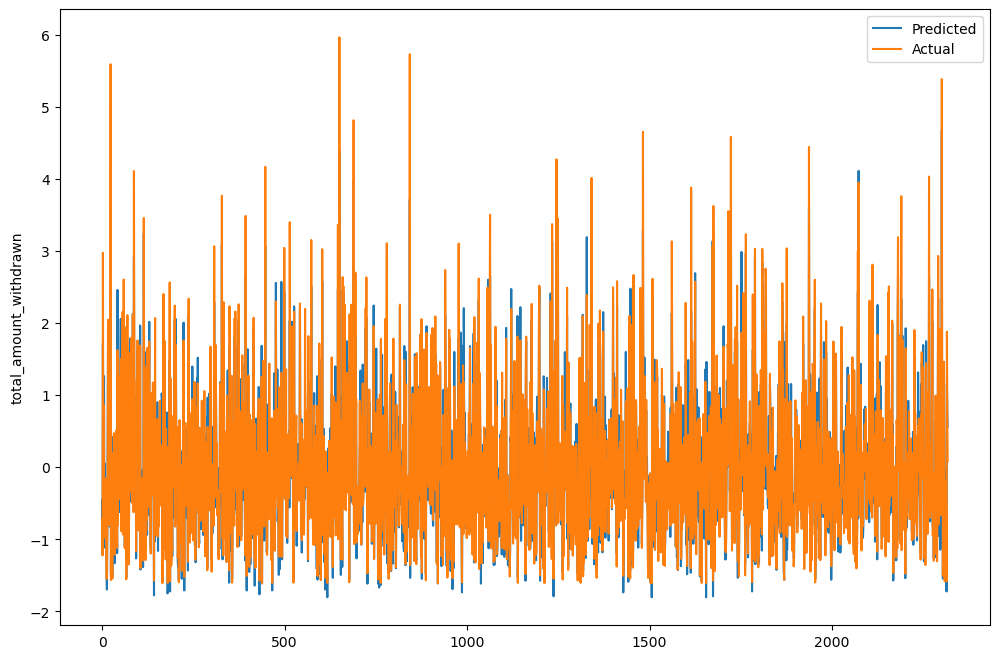

In [25]:
result_dict['total_amount_withdrawal ~ linear_with_trx_number&weekday&working_day'] = build_model(linear_reg,
                                                      'total_amount_withdrawn',
                                                     ['No_Of_Withdrawals',
                                                      'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_4,
                                                      show_plot_Y=True)

Training_score :  0.8452428549189546
Test_score :  0.8441437707730908


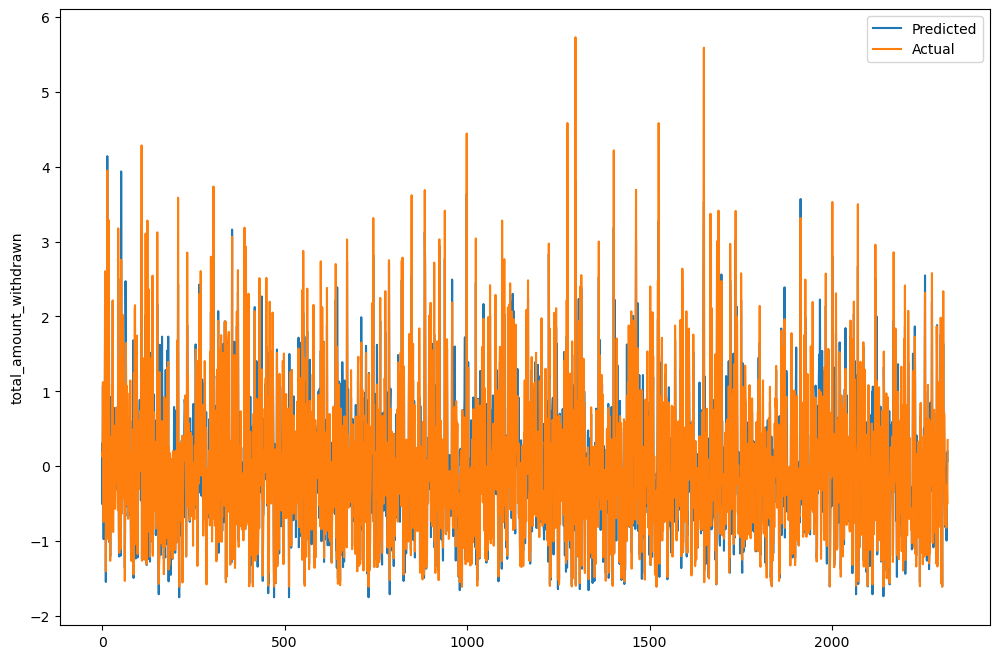

In [26]:
result_dict['total_amount_withdrawal ~ linear_with_trx_number&working_day'] = build_model(linear_reg,
                                                      'total_amount_withdrawn',
                                                     ['No_Of_Withdrawals',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_5,
                                                      show_plot_Y=True)

In [33]:
compare_results()

Regression:  total_amount_withdrawal ~ single_linear
Training score 0.8389926669274673
Test score 0.8453816625884092

Regression:  total_amount_withdrawal ~ linear_with_multiple_features_categorical&numeric
Training score 0.8888987119907436
Test score 0.8868590063938822

Regression:  total_amount_withdrawal ~ linear_with_only_atm_name
Training score 0.2296897706540202
Test score 0.24301784020067874

Regression:  total_amount_withdrawal ~ linear_with_trx_number&weekday&working_day
Training score 0.8458493509978152
Test score 0.8580839619674154

Regression:  total_amount_withdrawal ~ linear_with_trx_number&working_day
Training score 0.8452428549189546
Test score 0.8441437707730908



In [35]:
def lasso_reg(x_train, y_train, alpha=0.2):
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.8020838423847476
Test_score :  0.7919214379696582


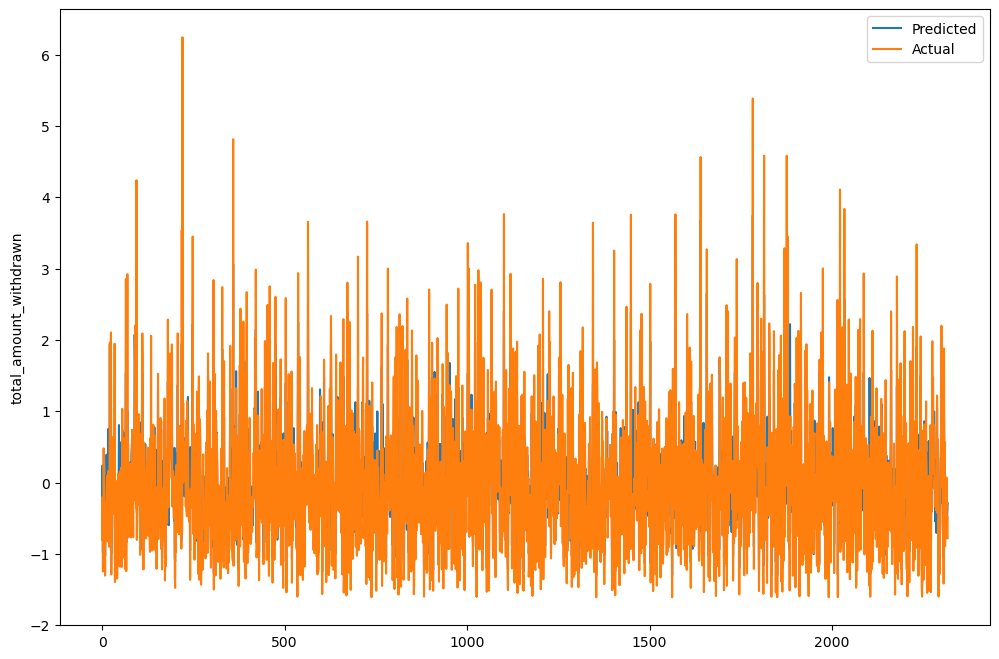

In [36]:
result_dict['total_amount_withdrawal ~ lasso_multiple_features_categorical&numeric'] = build_model(lasso_reg,
                                                     'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM',
                                                     'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_2,
                                                      show_plot_Y=True)

Training_score :  0.8024749727365876
Test_score :  0.8016109118737508


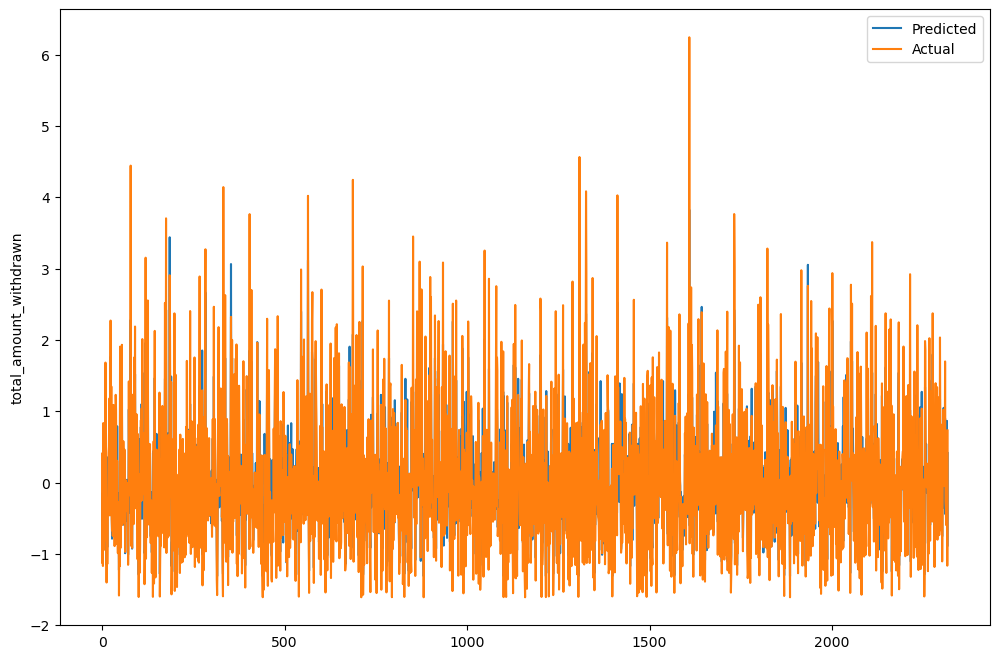

In [41]:
result_dict['total_amount_withdrawal ~ lasso_with_trx_number&weekday&working_day'] = build_model(lasso_reg,
                                                     'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_4,
                                                    show_plot_Y=True)

In [ ]:
#Lets try SVR regression on atmtrx_2 and atmtrx_4 after

In [39]:
def svr_reg(x_train, y_train, kernel='linear', epsilon=0.3, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C)
    model.fit(x_train,y_train)
    
    return model

Training_score :  0.8861115230914333
Test_score :  0.8953551243416473


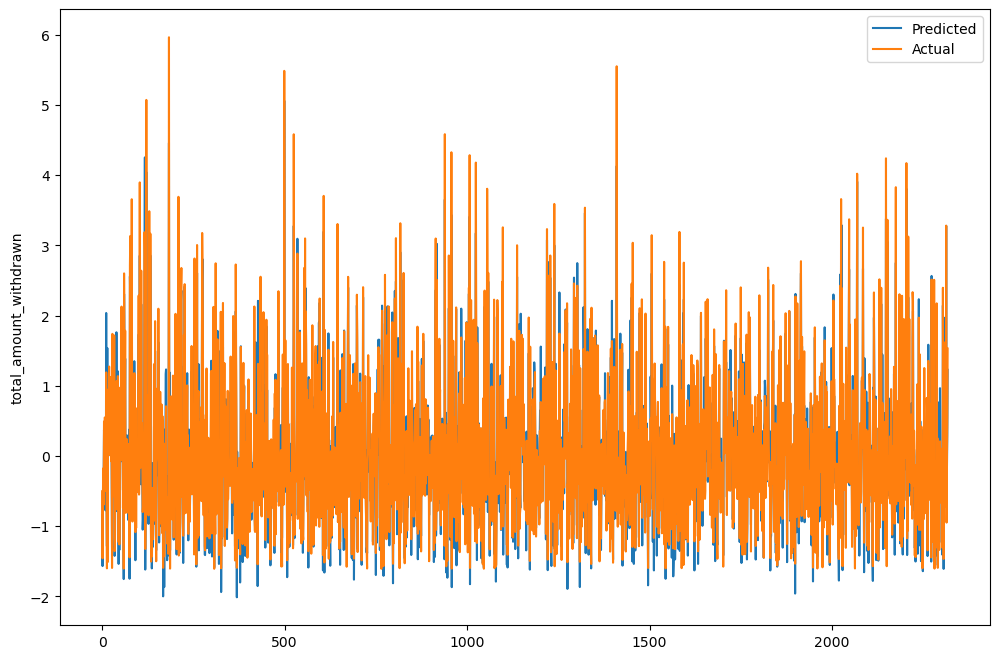

In [40]:
result_dict['total_amount_withdrawal ~ SVR_multiple_features_categorical&numeric'] = build_model(svr_reg,
                                                        'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM',
                                                     'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_2,
                                                     show_plot_Y=True)

Training_score :  0.8480274373490329
Test_score :  0.8491327780147974


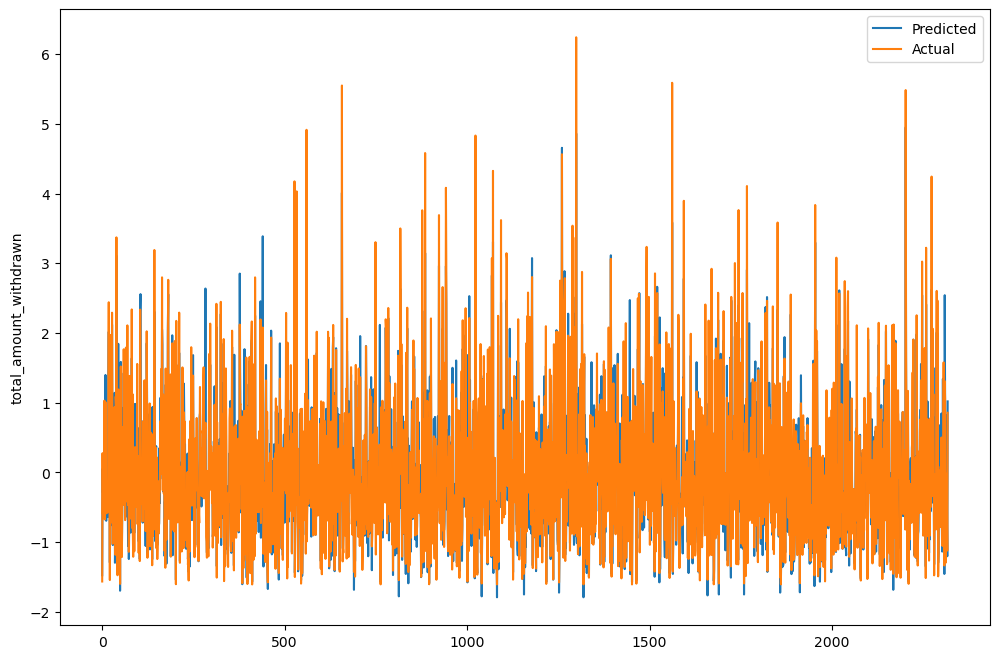

In [42]:
result_dict['total_amount_withdrawal ~ SVR_with_trx_number&weekday&working_day'] = build_model(svr_reg,
                                                     'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_4,
                                                    show_plot_Y=True)

In [ ]:
#Lets try KNeighbors regression with 'n_neighbors': 12 on atmtrx_2 and atmtrx_4

In [43]:
def kneighbors_reg(x_train, y_train, n_neighbors=12):
    model = KNeighborsRegressor(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.9087249363409963
Test_score :  0.8945531947402013


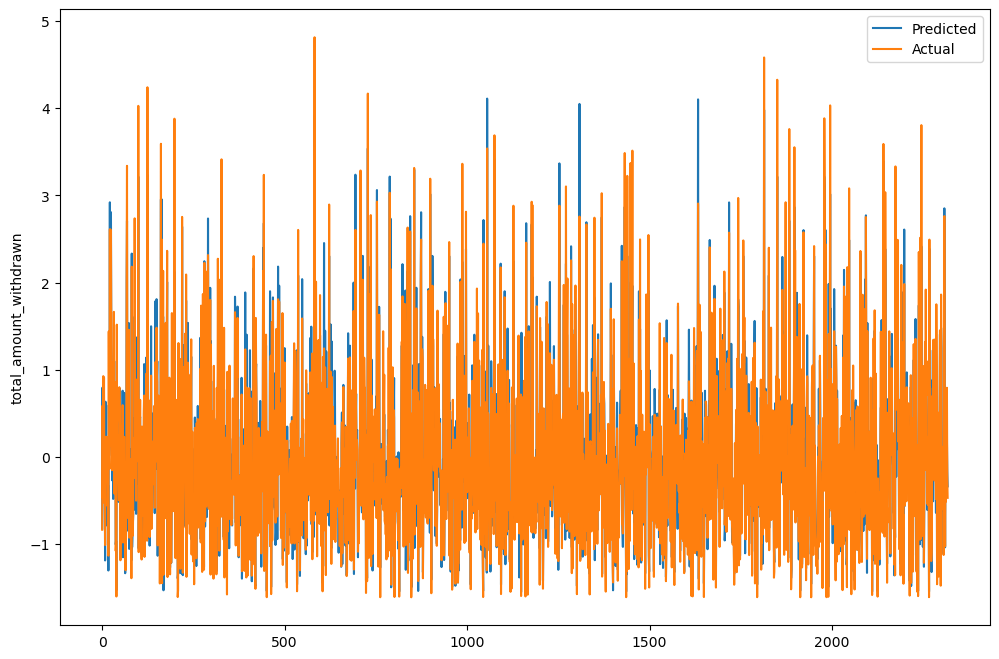

In [44]:
result_dict['total_amount_withdrawal ~ Kneighbors_multiple_features_categorical&numeric'] = build_model(kneighbors_reg,
                                                        'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM',
                                                     'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_2,
                                                     show_plot_Y=True)

Training_score :  0.8703825304358334
Test_score :  0.8378957447323255


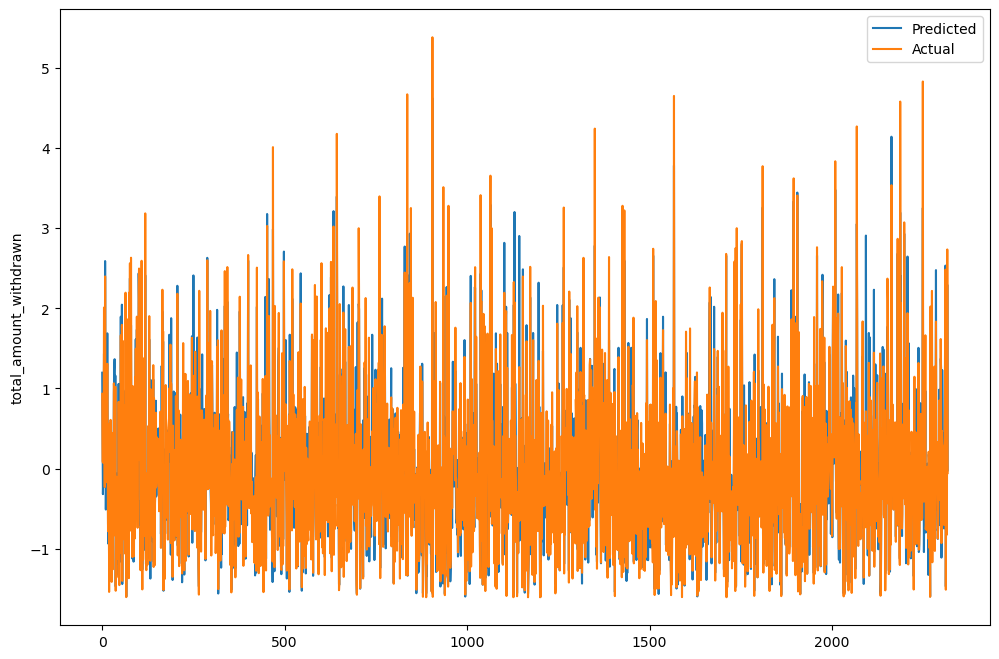

In [45]:
result_dict['total_amount_withdrawal ~ Kneighbors_with_trx_number&weekday&working_day'] = build_model(kneighbors_reg,
                                                     'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_4,
                                                    show_plot_Y=True)

In [ ]:
#Lets try Decision tree model with 'max_depth': 8 on atmtrx_2 and atmtrx_4

In [47]:
def decision_tree_reg(x_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(x_train, y_train)
    
    return model

Training_score :  0.7478527851806221
Test_score :  0.7360747446009686


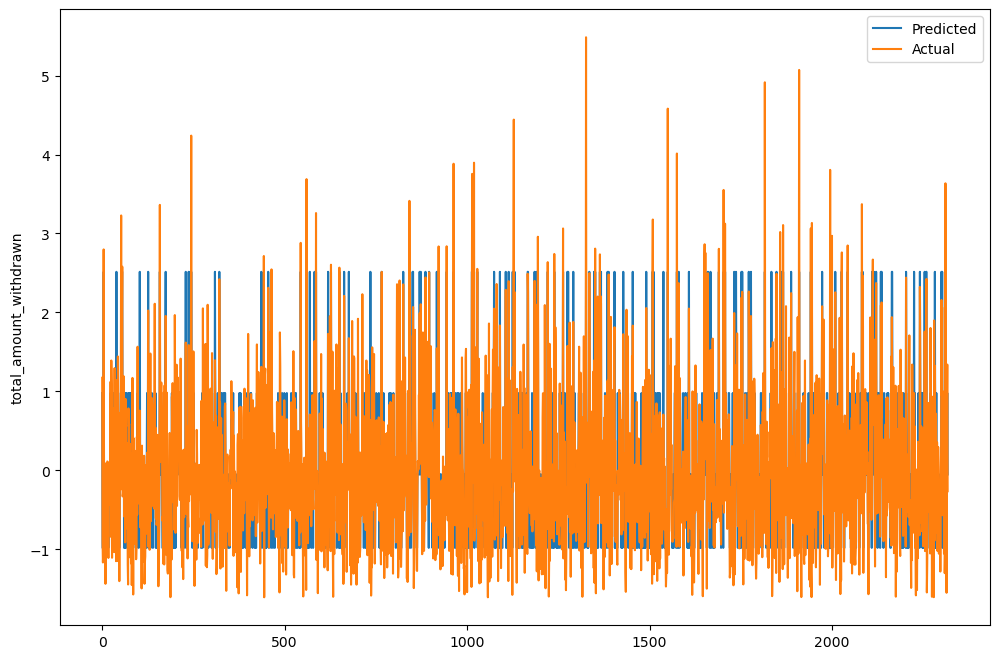

In [48]:
result_dict['total_amount_withdrawal ~ Decision_Tree_Model_multiple_features_categorical&numeric'] = build_model(decision_tree_reg,
                                                        'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'atm_name_Airport ATM','atm_name_Big Street ATM','atm_name_Christ College ATM','atm_name_KK Nagar ATM','atm_name_Mount Road ATM',
                                                     'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_2,
                                                     show_plot_Y=True)

Training_score :  0.7425149341418296
Test_score :  0.7585615939670645


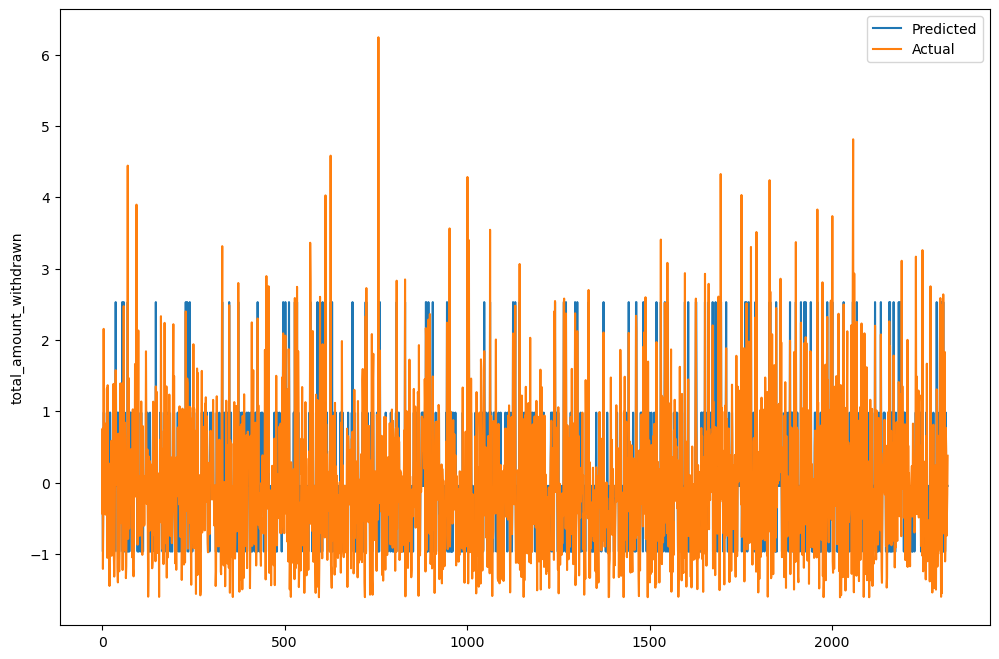

In [49]:
result_dict['total_amount_withdrawal ~ Decision_Tree_Model_with_trx_number&weekday&working_day'] = build_model(decision_tree_reg,
                                                     'total_amount_withdrawn',
                                                    ['No_Of_Withdrawals',
                                                      'weekday_friday','weekday_monday','weekday_saturday','weekday_sunday','weekday_thursday','weekday_tuesday','weekday_wednesday',
                                                      'working_day_H','working_day_W'],
                                                      atmtrx_4,
                                                    show_plot_Y=True)

In [ ]:
# Lets compare all of the results

In [50]:
compare_results()

Regression:  total_amount_withdrawal ~ single_linear
Training score 0.8389926669274673
Test score 0.8453816625884092

Regression:  total_amount_withdrawal ~ linear_with_multiple_features_categorical&numeric
Training score 0.8888987119907436
Test score 0.8868590063938822

Regression:  total_amount_withdrawal ~ linear_with_only_atm_name
Training score 0.2296897706540202
Test score 0.24301784020067874

Regression:  total_amount_withdrawal ~ linear_with_trx_number&weekday&working_day
Training score 0.8458493509978152
Test score 0.8580839619674154

Regression:  total_amount_withdrawal ~ linear_with_trx_number&working_day
Training score 0.8452428549189546
Test score 0.8441437707730908

Regression:  total_amount_withdrawal ~ lasso_multiple_features_categorical&numeric
Training score 0.8020838423847476
Test score 0.7919214379696582

Regression:  total_amount_withdrawal ~ lasso_with_trx_number&weekday&working_day
Training score 0.8024749727365876
Test score 0.8016109118737508

Regression:  tota

In [54]:
X = atmtrx_2.drop('total_amount_withdrawn', axis=1)
Y = atmtrx_2['total_amount_withdrawn']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [55]:
linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [56]:
y_pred = linear_model.predict(x_test)

In [57]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
3650,-0.119912,-0.444596
9514,0.038672,-0.433820
893,0.639817,0.418698
5511,-0.634470,-0.652414
11278,-0.763366,-0.732771
5687,0.426318,0.293699
10975,-0.659548,-0.789420
9568,-0.562714,-0.623781
4062,-0.634470,-0.697672
7255,1.112850,1.160995


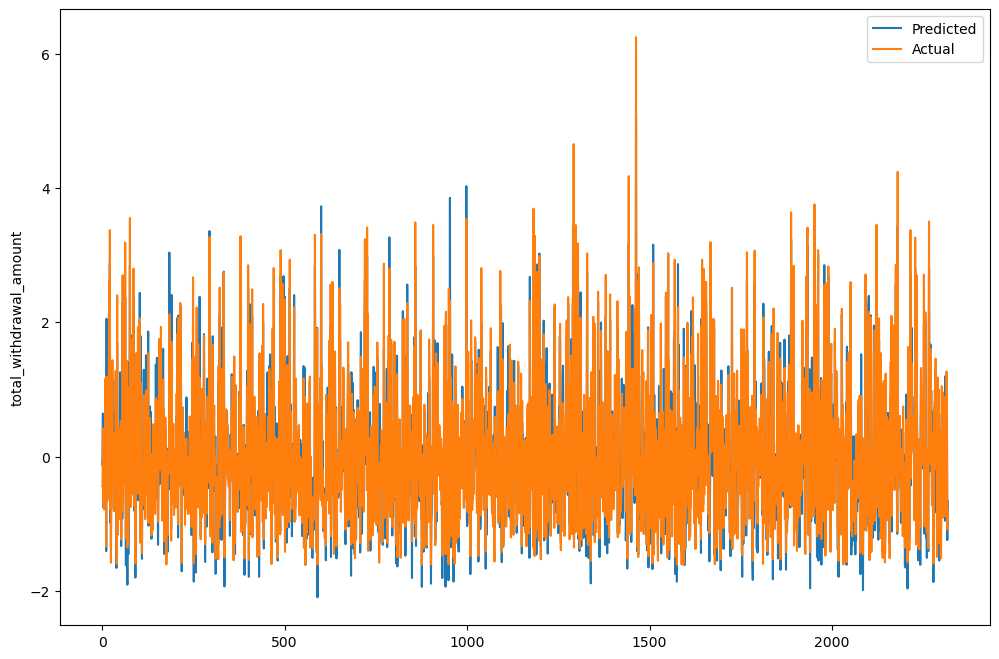

In [58]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('total_withdrawal_amount')

plt.legend()
plt.show()